<a href="https://colab.research.google.com/github/amandasmagalhaes/data-science-flai/blob/main/M%C3%B3dulo%205.1%20-%20ML%20Problemas%20Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelos de Classificação**

## Importação dos dados

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Custos%20M%C3%A9dicos/insurance.csv'
dados = pd.read_csv(url)

In [4]:
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000 

In [6]:
import seaborn as sns

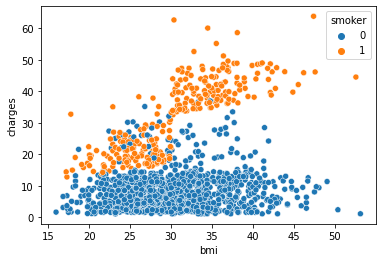

In [7]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados);

In [8]:
X = dados[['bmi', 'charges']]
y = dados['smoker'] 

In [9]:
X.head()

,bmi,charges
0,27.900,16.884924
1,33.770,1.725552
2,33.000,4.449462
3,22.705,21.984471
4,28.880,3.866855


In [10]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: int64

## **Validação Cruzada**

In [16]:
# Configuração da Validação Cruzada
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate


In [17]:
kf = KFold(n_splits = 10, shuffle = True)

## **Regressão Logística**

### **Estimação via Máxima Verossimilhança**  
Os EMV de B0 e B são obtidos via maximização direta da função de verossimilhança ou atráves do cálculo de suas 1as derivadas. Métodos numéricos são necessários para encontrá-los (Score de Fisher).  

*   Rápido para estimar/treinar
*   Muito rápido para classificar novas observações
*   Boa precisão para muitos conjuntos de dados simples
*   Resistente ao overfitting (baixa complexidade do modelo)
*   Pode-se interpretar os coeficientes do modelo como indicadores de importância  


### **Objetivo de uma validação**  
*   **Seleção de modelo:** estimando o desempenho de diferentes modelos para escolher o melhor.  
*   **Avaliação de modelo:** tendo escolhido um modelo final, estimando seu erro de previsão (erro de generalização) em novos dados.  

Quando usar cada método? Depende do poder computacional (Dar preferencia ao K-FOLD, caso fique muito devagar, usa-se o Holdout). Caso tenha muito dados, os resultados dos métodos se aproximam.

#### **Holdout (Divisão Teste e Treinamento)**  

#### **Validação Cruzada K-FOLD**  
Validação Cruzada em K partes (k-fold Cross Validation)  

In [18]:
from sklearn.linear_model import LogisticRegression 

modelo = LogisticRegression() 

### Desempenho do Modelo

In [21]:
metricas = cross_validate(modelo, X, y, cv = kf, scoring = ['accuracy', 'recall', 'precision'])
metricas

#fit_time: quanto tempo demorou para ajustar cada uma das folds
#score_time: quanto tempo demorou, uma vez que o modelo estava treinado, classificar todos os dados no conjunto teste e ver os resultados
#teste_accuracy: metrica - valores das folds

{'fit_time': array([0.01845479, 0.01008153, 0.00982189, 0.01664543, 0.01013565,
        0.0091393 , 0.0094552 , 0.00989223, 0.0091877 , 0.00914812]),
 'score_time': array([0.00377417, 0.00286388, 0.00274897, 0.00363016, 0.00266457,
        0.00258851, 0.00299478, 0.00270844, 0.00272298, 0.00258994]),
 'test_accuracy': array([0.89552239, 0.93283582, 0.89552239, 0.92537313, 0.95522388,
        0.93283582, 0.94029851, 0.94776119, 0.93984962, 0.94736842]),
 'test_precision': array([0.83333333, 0.91304348, 0.72727273, 0.8       , 0.9375    ,
        0.75      , 0.80769231, 0.89473684, 0.93103448, 0.95652174]),
 'test_recall': array([0.66666667, 0.75      , 0.82758621, 0.8       , 0.88235294,
        0.85714286, 0.875     , 0.77272727, 0.81818182, 0.78571429])}

### **Métricas para classificação binária**  

Matriz de confusão (preditos x observados)  

*   #### **Acurácia:** também chamado de **taxa de acerto**
Acurácia = [(VN + VP) / (VN + VP + FN + FP)]  

*   #### **Sensibilidade:** também chamada de recall, taxa de verdadeiro positivos
Sensibilidade = [(VP) / (Vp + FN)]  

*   #### **Valor Preditivo Positivo:** também chamada de **precisão**
VPP = [(VP) / (VP + FP)]  
O quanto meu modelo é preciso  


In [24]:
print('Acuracia:', metricas['test_accuracy'].mean().round(2))
print('Sensibilidade:', metricas['test_recall'].mean().round(2))
print('VPP:', metricas['test_precision'].mean().round(2))

Acuracia: 0.93
Sensibilidade: 0.8
VPP: 0.86


### Região de Decisão

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


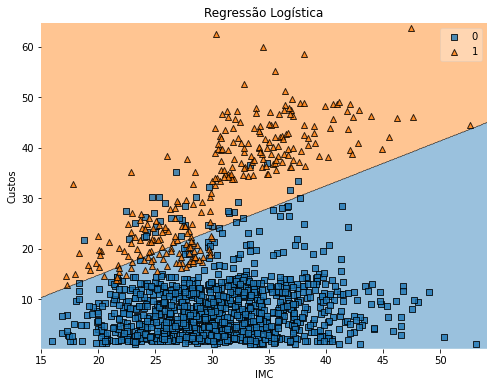

In [31]:
from mlxtend.plotting import plot_decision_regions

import matplotlib.pyplot as plt

modelo = LogisticRegression()
modelo.fit(X, y)
 
plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Regressão Logística')  
plt.show()

## **KNN**

### Implementação do Modelo

In [51]:
from sklearn.neighbors import KNeighborsClassifier 

nome = '25-NN'
modelo = KNeighborsClassifier(n_neighbors = 75)
metricas = cross_val_score(modelo, X, y, cv = kf, scoring = 'accuracy')
knn5 = metricas.mean()
print('Acurácia ' + nome + ': {:.2f}%'.format(100*knn5))

Acurácia 25-NN: 94.84%


### Região de Decisão

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


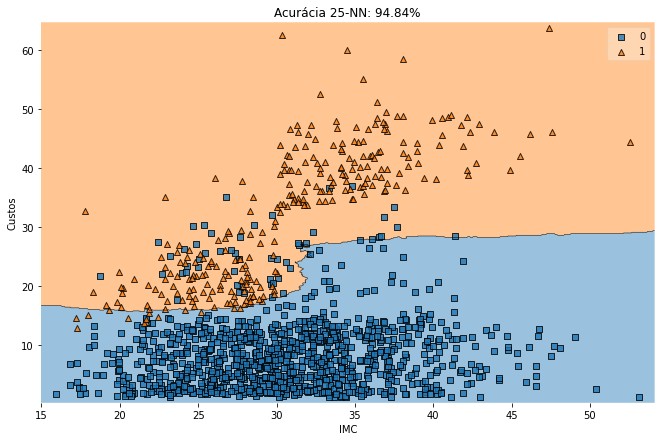

In [52]:
modelo.fit(X, y)

plt.figure(figsize = (11, 7))
plot_decision_regions(X.values, y.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Acurácia ' + nome + ': {:.2f}%'.format(100*knn5))
plt.show()

## **Árvores de Decisão**

### Implementação do Modelo

In [67]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth = 3)

metricas = cross_val_score(modelo, X, y, cv = kf, scoring = 'accuracy')
knn5 = metricas.mean()

print('Acurácia Árvore de Decisão: {:.2f}%'.format(100*knn5))

Acurácia Árvore de Decisão: 96.34%


### Região de Decisão

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


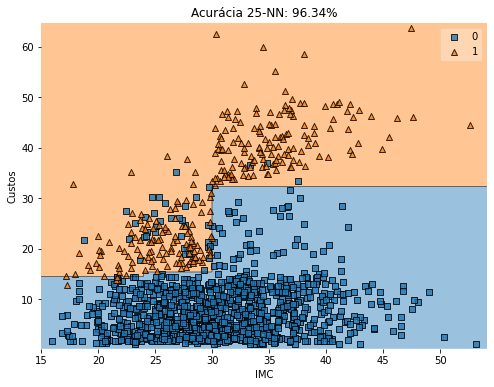

In [68]:
modelo.fit(X, y)
 
plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Acurácia ' + nome + ': {:.2f}%'.format(100*knn5 ))  
plt.show()

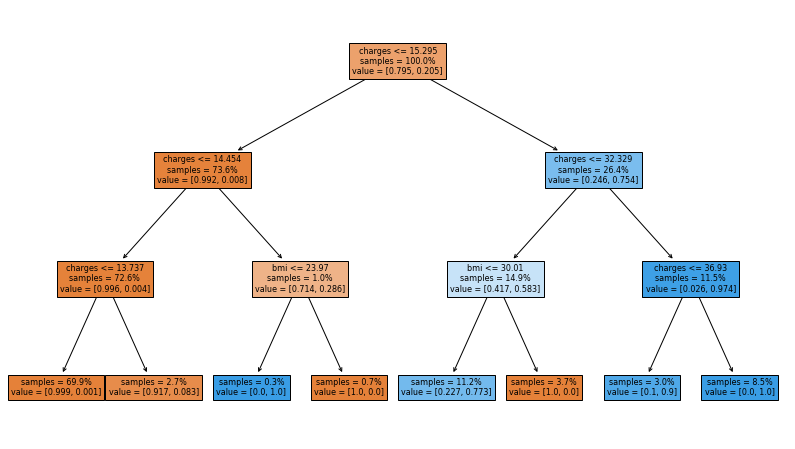

In [69]:
from sklearn.tree import plot_tree

plt.figure(figsize = (14, 8))
plot_tree(modelo, filled=True, proportion = True, impurity = False, feature_names = X.columns)
plt.show()